(<AxesSubplot:>,
 ([], []),
 ([], []))

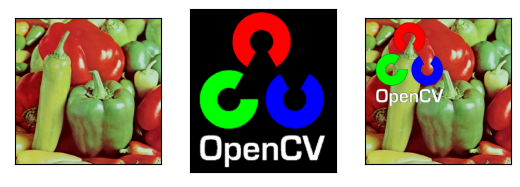

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('peppers_color.tif', cv.IMREAD_COLOR)
logo = cv.imread('logo_color.png', cv.IMREAD_COLOR)

plt.imshow(logo)

rows, cols, dims = logo.shape

compose = img.copy()

part = compose[10:10+rows, 20:20+cols]

logo_gray = cv.cvtColor(logo,cv.COLOR_BGR2GRAY)

ret, logo_mask = cv.threshold(logo_gray, 10, 255, cv.THRESH_BINARY)
logo_mask_inv = cv.bitwise_not(logo_mask)

back_ground = cv.bitwise_and(part, part, mask=logo_mask_inv)
fore_ground = cv.bitwise_and(logo, logo, mask=logo_mask)

blend = cv.add(back_ground, fore_ground)

part[:] = blend

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
logo_rgb = cv.cvtColor(logo, cv.COLOR_BGR2RGB)
compose_rgb = cv.cvtColor(compose, cv.COLOR_BGR2RGB)

plt.subplot(1,3,1), plt.imshow(img_rgb), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2), plt.imshow(logo_rgb), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3), plt.imshow(compose_rgb), plt.xticks([]), plt.yticks([])